# MULTIPLE LINEAR REGRESSION #

### Multiple Preditors and Signal Target
1. y ~ x1, x2, x3, ..., xn
2. $ y_pred = B0 + B1*x1 + B2 *x2 + Bn * xn$

In [2]:
# Ignore non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion - Read the data using pandas dataframe

In [3]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Profit - RND, ADMIN, MKT
$ PROFIT_pred = B0 + B1*RND + B2*ADMIN + B3*MKT $

# Step 2 - Perform Basic Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Visualize the Data

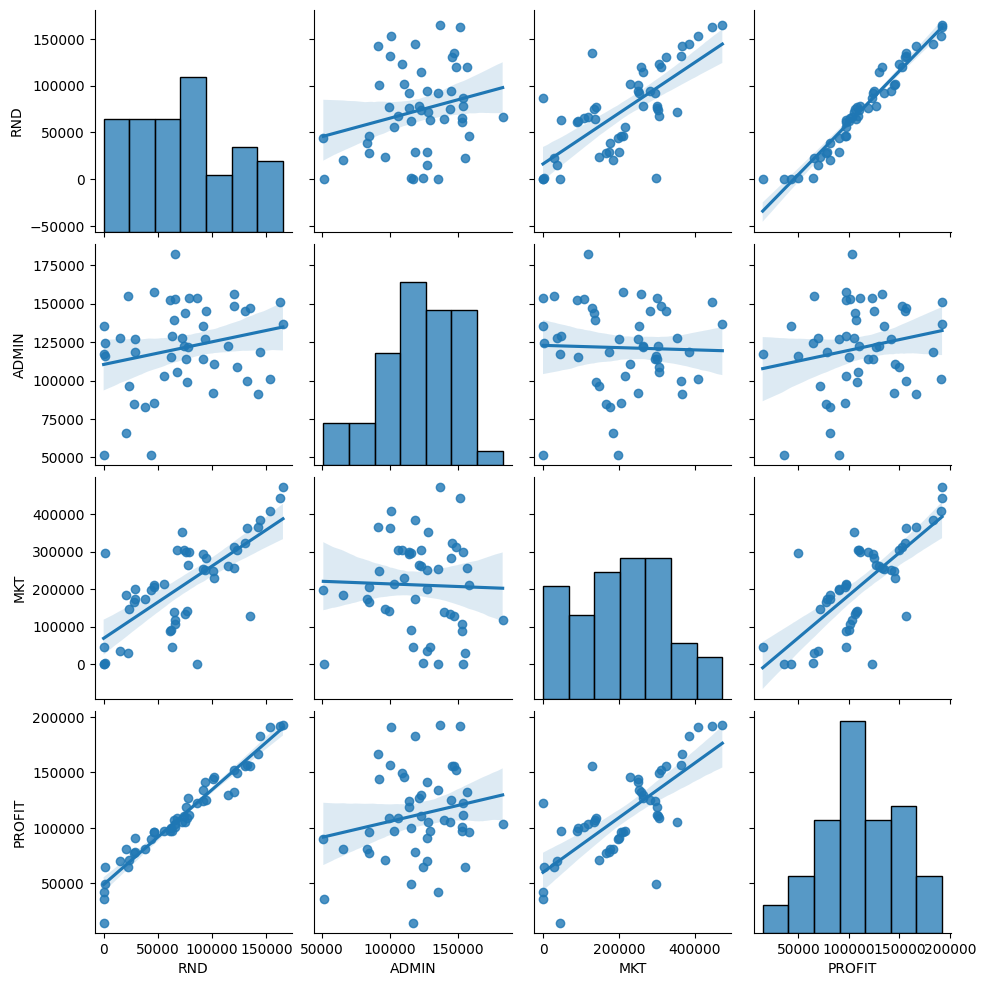

In [8]:
import seaborn as sns

sns.pairplot(df, kind="reg")

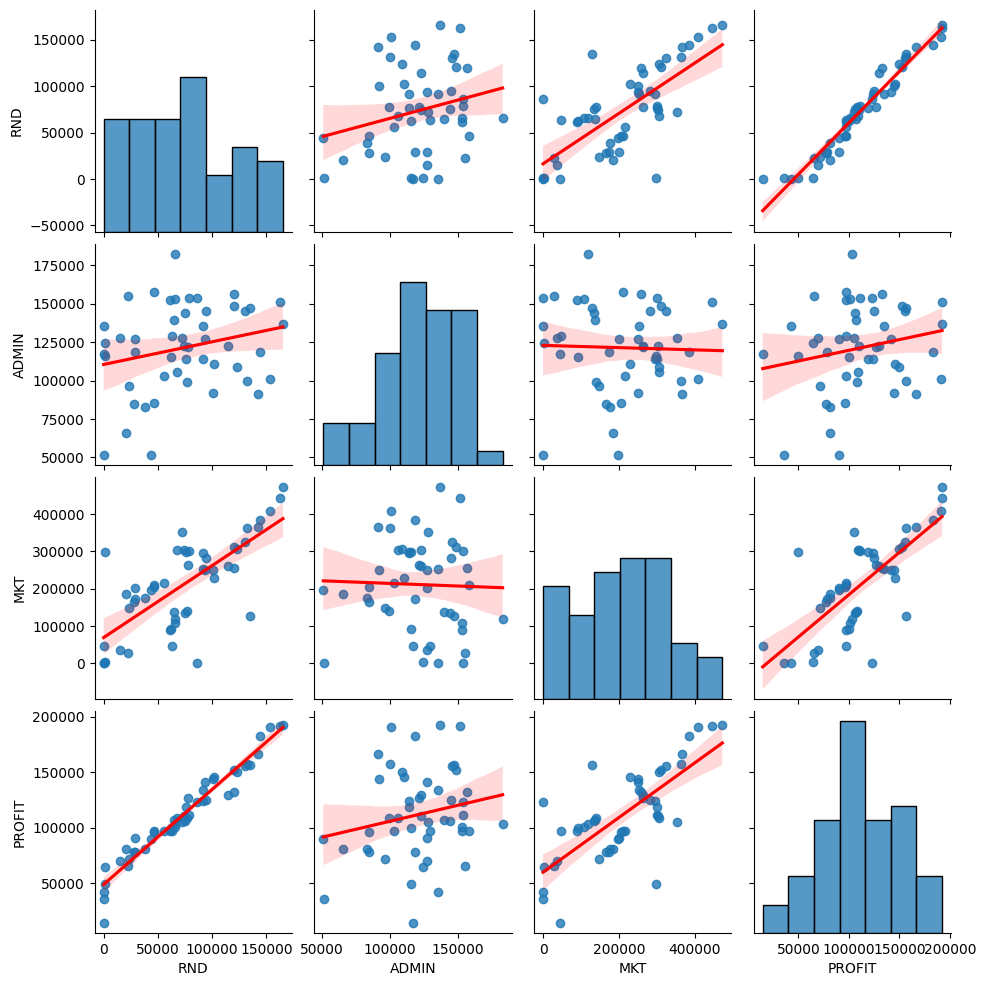

In [9]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

# Step 4 - Separate X & Y (PROFIT)

In [40]:
X = df[["RND", "ADMIN", "MKT"]]

In [41]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [42]:
Y = df["PROFIT"]

In [43]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

# Step 5 - Building Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [45]:
model.intercept_

np.float64(50122.192989865274)

In [46]:
model.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [52]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [53]:
coefs = pd.Series(model.coef_.flatten(), index=X.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'Coefficients of the Linear Regression Model'}>

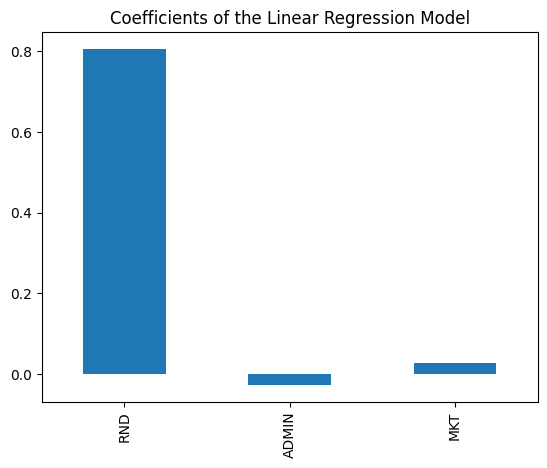

In [54]:
coefs.plot(kind="bar", title="Coefficients of the Linear Regression Model")

### Fitted Equation
$ Profit_pred = 50122.19 + 0.8057*RND - 0.0268*ADMIN + 0.0272*MKT $

### Following conclusion
1. if RND increased by 1 unit, Profit will increase by 0.8057
2. if ADMIN increased by 1 unit, Profit will decrease by 0.0268
1. if MKT increased by 1 unit, Profit will increase by 0.0272

### For Increasing the Profit, RND budget, is more important compared to others

# Step 6 - Model Evaluation

In [47]:
model.score(X, Y)

0.9507459940683246

In [48]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [55]:
ypred = model.predict(X)
ypred[0:5]

array([192521.25289008, 189156.76823227, 182147.2790962 , 173696.70002553,
       172139.51418327])

In [56]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [50]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)

    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    r2 = r2_score(y, ypred)

    print(f"RMSE: {rmse: .2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2: .2%}")

In [51]:
evaluate_model(model, X, Y)

RMSE:  8855.34
MAE: 6471.45
MSE: 78417126.02
R2:  95.07%


# Step 7 - Out of Sample Prediction

In [57]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [58]:
rnd = 1_50_000
admin = 1_00_000
mkt = 1_00_000
xnew = [[rnd, admin, mkt]]
profit_pred = model.predict(xnew)
profit_pred

array([171020.66011783])